# Anushka Kawale
## LGMVIP January,2022
## Advance Task 02
## Next Word Prediction

In [1]:
#Importing the data
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [2]:
#Load the data 
path = "E:\\internship task\\1661-0.txt"
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581887


In [3]:
#Processing the data 
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')


unique chars: 72


In [4]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193949


In [5]:
#generatinf features and labels
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool_)
y = np.zeros((len(sentences), len(character)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [6]:
sentences[124]

'author: arthur conan doyle\n\nrelease date'

In [7]:
next_chars[100]

' '

In [8]:
X[0][0]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [9]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [10]:
X.shape

(193949, 40, 72)

In [11]:
y.shape

(193949, 72)

In [12]:
#creation of the model
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               102912    
                                                                 
 dense (Dense)               (None, 72)                9288      
                                                                 
 activation (Activation)     (None, 72)                0         
                                                                 
Total params: 112,200
Trainable params: 112,200
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Training Our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=30, 
                    shuffle=True).history

Epoch 1/30
1501/1501 [==============================] - 94s 60ms/step - loss: 1.9543 - accuracy: 0.4257 - val_loss: 2.1616 - val_accuracy: 0.4046
Epoch 2/30
1501/1501 [==============================] - 89s 59ms/step - loss: 1.6164 - accuracy: 0.5160 - val_loss: 2.0454 - val_accuracy: 0.4582
Epoch 3/30
1501/1501 [==============================] - 89s 59ms/step - loss: 1.5226 - accuracy: 0.5428 - val_loss: 1.9943 - val_accuracy: 0.4649
Epoch 4/30
1501/1501 [==============================] - 88s 58ms/step - loss: 1.4707 - accuracy: 0.5566 - val_loss: 1.9732 - val_accuracy: 0.4742
Epoch 5/30
1501/1501 [==============================] - 87s 58ms/step - loss: 1.4369 - accuracy: 0.5663 - val_loss: 1.9985 - val_accuracy: 0.4825
Epoch 6/30
1501/1501 [==============================] - 87s 58ms/step - loss: 1.4126 - accuracy: 0.5719 - val_loss: 2.0008 - val_accuracy: 0.4711
Epoch 7/30
1501/1501 [==============================] - 87s 58ms/step - loss: 1.3941 - accuracy: 0.5769 - val_loss: 1.9896 -

In [16]:
#saving our model
model.save('keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

In [17]:
#loading our model
model = load_model('keras_model.h5')
history = pickle.load(open("history.p", "rb"))

In [18]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 42s 7ms/step - loss: 1.2301 - accuracy: 0.6203
Test Loss 1.2301315069198608
Test Accuracy 0.6203228831291199


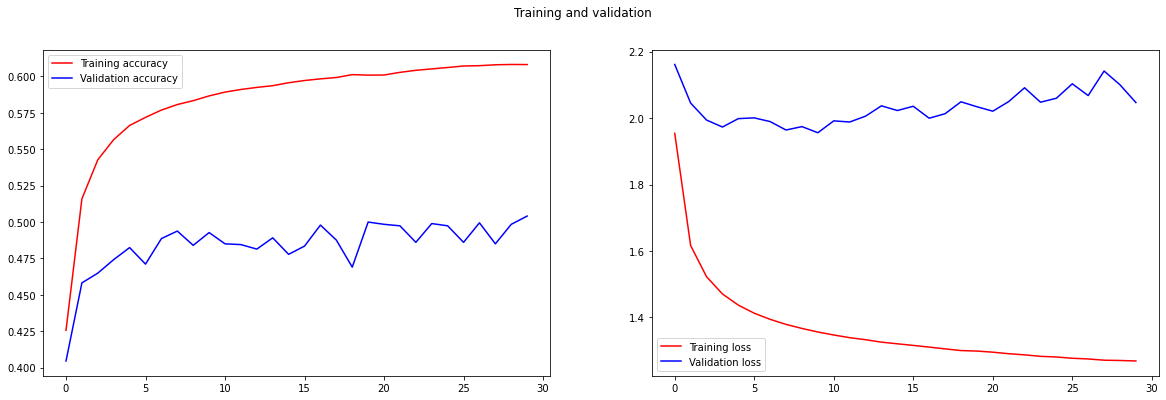

In [19]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [20]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x
prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [21]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [22]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [23]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [24]:
#Prediction 
sentences = ["Ryder passed his tongue over his parched lips. “I will tell you it just as it happened, sir, said he. “When Horner had been arrested, it seemed to me that it would be best for me to get away with the stone at once, for I did not know at what moment the police might not take it",
"into their heads to search me and my room. There was no place about the hotel where it would be safe. I went out, as if on some commission, and I made for my sister’s house. She had married a man named Oakshott, and lived in Brixton Road, where she fattened fowls for the market. All the",
"way there every man I met seemed to me to be a policeman or a detective; and, for all that it was a cold night, the sweat was pouring down my face before I came to the Brixton Road. My sister asked me what was the matter, and why I was so pale; but I told her that I had been",
"upset by the jewel robbery at the hotel. Then I went into the back yard and smoked a pipe and wondered what it would be best to do."]

In [25]:
for s in sentences:
    seq = s[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()
    

ryder passed his tongue over his parched
[' and ', ', ', '\nin ', '. ', 'ly ']

into their heads to search me and my roo
['m ', 's ', 'f ', 'n ', 'r, ']

way there every man i met seemed to me t
['o ', 'hat ', 'ranging ', 'en ', 'urning ']

upset by the jewel robbery at the hotel.
[' i ', '\n\n“it ', '”\n\n“i ', '’\n\n“‘i ', 'mbach ']

